<a href="https://colab.research.google.com/github/OsvaldoYa22/EventosDiscretos/blob/main/EvntosDiscretos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulacion de eventos discretos**

Ejercicios realizados en la clase del profesor Salat Figols Ramon Sebastian departamento de matemáticas ESFM.


# **LINEAS DE ESPERA**

Simular una linea de espera con un servidor
 * Los clinentes llegan siquiendo un proceso de Poisson
 * Los tiempos de atención en el servidor siguen una distribucion Exponencial

     0.000 1
     1.980 2
                  2.222 1
                  2.520 0
     2.756 1
     3.232 2
     3.302 3
                  3.322 2
                  4.244 1
                  5.549 0
     5.790 1
                  5.826 0
     6.188 1
     7.202 2
                  7.516 1
     8.106 2
     8.135 3
     8.524 4
                  8.899 3
                  9.495 2
                 10.056 1
    10.070 2
    10.079 3
    10.578 4
    11.042 5
    11.202 6
    11.750 7
                 12.599 6
    13.543 7
    14.010 8
                 14.437 7
    14.676 8
    15.008 9
                 15.548 8
                 15.811 7
                 15.956 6
                 16.025 5
                 16.074 4
                 16.206 3
    16.238 4
                 16.525 3
    18.022 4
                 18.083 3
                 18.450 2
    19.082 3
    19.465 4
                 19.759 3


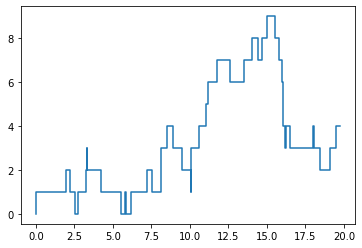

In [ ]:
from random import random 
from math import log
import matplotlib.pyplot as plt
T=20    #tiempo de simulación
l_l=1   #parametro lambda, llega un usario por minuto
l_s=1.3 #clientes por minuto que puede atender el servidor
t=0     #tiempo de reloj inicial
infi=100000000
ts=infi #tiempo de ocurrencia de la proxima salida
tl=0    #tiempo de ocurrencia de la proxima llegada
l=0
lx=[]
ly=[]
while min(tl,ts)<T:
    ta=t
    t=min(tl,ts)
    lx.append(ta)
    ly.append(l)
    lx.append(t)
    ly.append(l)
    if t==tl: #es una llegada
        l=l+1
        print("%10.3f"%tl,l)
        tl=t-(1/l_l)*log(random())
        if l==1:
            ts=t-(1/l_s)*log(random()) #generando una exponencial (metodo de la inversa)
    else:     #es una salida
        l=l-1
        print("            ","%10.3f"%ts,l)
        if l==0:
            ts=infi
        else:
            ts=t-(1./l_s)*log(random())
plt.plot(lx,ly)
plt.show()
#Los eventos a la izquierda son llegadas y a la derecha son salidas

# **INVENTARIOS**

Parametros
 * Los clientes llegan siguendo un proceso de Poisson uniforme
 * Cada cleinte compra un solo articulo 

q cantidad de  articulos en el almacén

Enventos
 * 1 llegada de un cliente
 * 2 llegada del proveedor

In [ ]:
from math import log
from random import random

T=300   #intervalo de tiempo
s=10    #q minima
s=20    #q maxima
q=20    #cantidad de articulos actuales
l_l=0.5 #llegada de clientes por minuto
t=0     #tiempo actual de la simulacion
tl=0
#tl=-(1/l_l)*log(random()) 
tr=0    #tiempo de la proxima llegada del proveedor
rep=30  #provedor va cada 30 días
v=0     #articulos vendidos al momento
nv=0    #numero de articulos no vendidos que se perdieron por no haber en el almacen
costo=0 #costo de almacen
ganancia=0 #ganancia actual
costounitario=0.05 #costo de tener una unidad de articulo por unidad de tiempo
gananciaunitaria=40 #gaanancia por cada articulo
while t<T:
  ta=t #tiempo del evento anterior
  t=min(tl,tr) 
  costo=costo+(t-ta)*q*costounitario 
  if t==tl: #primer evento en ocurrir la llegada de un cliente 
    if q>0: # si hay articulos
      q=q-1 #los articulos reducen en 1 por el cliente que se lo llevo
      print("llegada","%10.2f"%tl,q) #imprime el tiempo en el que ocurre y la cantidad de articulos hasta el momento
      v=v+1 #articulos vendidos
      ganancia=ganancia+gananciaunitaria #incrementa ganancia por que se vendio un articulo
    else: # no hay articulos en el almacen para vender
      print("Llegada","%10.2f"%tl,q,"     Venta perdida") 
      nv=nv+1  #numero de articulos no vendidos se incrementa en 1
    tl=tl-(1/l_l)*log(random()) #genero la proxima llegada de un cliente (metodo de la inversa)
    #observe que en un proceso de Poisson Uniforme los tiempos entre dos eventos consecutivos siguen una distribucion Exponencial 
  else: #minimo fue tr (llegada del proveedor)
    if q<s: #cantidad de articulos en el almacen 
      q=s #aunemta al maximo de articulos
    print("Tiempo de reposición","%10.2f"%tr,q)
    tr=tr+rep #tiempo de la proxima reposicion (tiempo actual + 30 días)
print("Ganancia: ",ganancia)
print("Costo: ",costo)
print("Ganancia neta: ",ganancia-costo)
print("Número de articulos no vendidos",nv,nv*gananciaunitaria)


llegada       0.00 19
Tiempo de reposición       0.00 20
llegada       5.46 19
llegada       6.18 18
llegada       7.56 17
llegada      11.06 16
llegada      14.57 15
llegada      14.82 14
llegada      17.45 13
llegada      18.77 12
llegada      19.67 11
llegada      19.96 10
llegada      21.39 9
llegada      23.04 8
llegada      24.39 7
llegada      24.40 6
llegada      24.57 5
llegada      25.49 4
llegada      25.66 3
llegada      28.22 2
Tiempo de reposición      30.00 20
llegada      30.47 19
llegada      31.22 18
llegada      33.45 17
llegada      36.76 16
llegada      37.27 15
llegada      39.61 14
llegada      40.05 13
llegada      40.36 12
llegada      41.15 11
llegada      41.35 10
llegada      44.77 9
llegada      50.09 8
llegada      52.18 7
llegada      53.05 6
llegada      53.09 5
llegada      53.76 4
llegada      57.21 3
Tiempo de reposición      60.00 20
llegada      61.90 19
llegada      63.77 18
llegada      64.61 17
llegada      66.75 16
llegada      68.98 15
llegada 

Observe que en un proceso de **Poisson Uniforme** los tiempos entre dos eventos consecutivos siguen una distribucion **Exponencial** con parametro igual al de proceso de Poisson

Mismo programa con ***grafica***

Ganancia:  4960
Costo:  204.24969674694637
Ganancia neta:  4755.750303253054
Número de articulos no vendidos 2 80


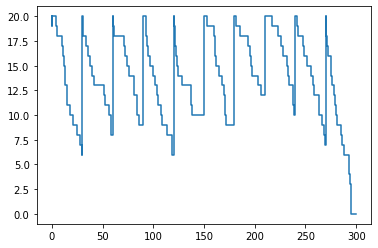

In [ ]:
from math import log
from random import random
from matplotlib import *

T=300 #intervalo de tiempo
s=10 #q minima
s=20 #q maxima
q=20 #cantidad de articulos actuales
l_l=0.5 #llegada de clientes por minuto
t=0 #tiempo actual de la simulacion
tl=0
#tl=-(1/l_l)*log(random()) 
tr=0 #tiempo de la proxima llegada del proveedor
rep=30 #provedor va cada 30 días
v=0 #articulos vendidos al momento
nv=0 #numero de articulos no vendidos que se perdieron por no haber en el almacen
costo=0 #costo de almacen
ganancia=0 #ganancia actual
costounitario=0.05 #costo de tener una unidad de articulo por unidad de tiempo
gananciaunitaria=40 #gaanancia por cada articulo
lt=[]
lq=[]
while t<T:
  ta=t #tiempo del evento anterior
  t=min(tl,tr) 
  costo=costo+(t-ta)*q*costounitario 
  lt.append(ta)
  lq.append(q)
  lt.append(t)
  lq.append(q)
  if t==tl: #primer evento en ocurrir la llegada de un cliente 
    if q>0: # si hay articulos
      q=q-1 #los articulos reducen en 1 por el cliente que se lo llevo
      #print("llegada","%10.2f"%tl,q) #imprime el tiempo en el que ocurre y la cantidad de articulos hasta el momento
      v=v+1 #articulos vendidos
      ganancia=ganancia+gananciaunitaria #incrementa ganancia por que se vendio un articulo
    else: # no hay articulos en el almacen para vender
      #print("Llegada","%10.2f"%tl,q,"     Venta perdida") 
      nv=nv+1  #numero de articulos no vendidos se incrementa en 1
    tl=tl-(1/l_l)*log(random()) #genero la proxima llegada de un cliente (metodo de la inversa)
    #observe que en un proceso de Poisson Uniforme los tiempos entre dos eventos consecutivos siguen una distribucion Exponencial 
  else: #minimo fue tr (llegada del proveedor)
    if q<s: #cantidad de articulos en el almacen 
      q=s #aunemta al maximo de articulos
    #print("Tiempo de reposición","%10.2f"%tr,q)
    tr=tr+rep #tiempo de la proxima reposicion (tiempo actual + 30 días)
print("Ganancia: ",ganancia)
print("Costo: ",costo)
print("Ganancia neta: ",ganancia-costo)
print("Número de articulos no vendidos",nv,nv*gananciaunitaria)
plt.plot(lt,lq)
plt.show()

Inventario variable
 * Numero de articulos que piden los clientes sigue una distribucion de Poisson con parametro 3

In [ ]:
from math import log
from numpy import random
from matplotlib import *

T=100 #intervalo de tiempo
s=50 #q minima
s=150 #q maxima
q=s #cantidad de articulos actuales
l_l=0.5 #llegada de clientes por minuto
t=0 #tiempo actual de la simulacion
tl=0
#tl=random.exponential(l_l)
tr=0 #tiempo de la proxima llegada del proveedor
rep=30 #provedor va cada 30 días
v=0 #articulos vendidos al momento
nv=0 #numero de articulos no vendidos que se perdieron por no haber en el almacen
costo=0 #costo de almacen
ganancia=0 #ganancia actual
costounitario=0.05 #costo de tener una unidad de articulo por unidad de tiempo
gananciaunitaria=40 #gaanancia por cada articulo
lt=[]
lq=[]
while t<T:
  ta=t #tiempo del evento anterior
  t=min(tl,tr) 
  costo=costo+(t-ta)*q*costounitario 
  if t==tl: #primer evento en ocurrir la llegada de un cliente

    dem=random.poisson(3) #genero cuantos articulos pide el cliente

    if q>=dem: # si hay articulos
      q=q-dem #los articulos reducen en (cantidad de articulos que se simulo) por el cliente que se lo llevo
      print("llegada","%10.2f"%tl,"Demanda",dem,q) #imprime el tiempo en el que ocurre y la cantidad de articulos hasta el momento
      v=v+dem 
      ganancia=ganancia+gananciaunitaria*dem 
    else: # no hay articulos en el almacen para vender
      v=v+q
      nv=nv+dem-q
      ganancia=ganancia+q*gananciaunitaria
      print("Venta perdida","%10.2f"%tl,"Demanda ",dem,"ventas perdidas") 
      q=0 #vendemos todos los que tenemos
    tl=tl+random.exponential(l_l)
  else: 
    if q<s: 
      q=s #aunemta al maximo de articulos
    print("Tiempo de reposición","%10.2f"%tr,q)
    tr=tr+rep #tiempo de la proxima reposicion (tiempo actual + 30 días)
print("Ganancia: ",ganancia)
print("Costo: ",costo)
print("Ganancia neta: ",ganancia-costo)
print("Número de articulos no vendidos",nv,nv*gananciaunitaria)


llegada       0.00 Demanda 5 145
Tiempo de reposición       0.00 150
llegada       0.59 Demanda 5 145
llegada       0.81 Demanda 6 139
llegada       1.56 Demanda 1 138
llegada       1.94 Demanda 8 130
llegada       2.20 Demanda 6 124
llegada       2.31 Demanda 2 122
llegada       3.24 Demanda 3 119
llegada       3.35 Demanda 4 115
llegada       3.73 Demanda 1 114
llegada       4.18 Demanda 2 112
llegada       5.44 Demanda 3 109
llegada       6.22 Demanda 2 107
llegada      10.37 Demanda 3 104
llegada      10.43 Demanda 3 101
llegada      11.53 Demanda 5 96
llegada      11.86 Demanda 3 93
llegada      11.87 Demanda 2 91
llegada      12.32 Demanda 3 88
llegada      12.82 Demanda 2 86
llegada      13.16 Demanda 3 83
llegada      13.35 Demanda 1 82
llegada      13.59 Demanda 3 79
llegada      13.84 Demanda 2 77
llegada      14.42 Demanda 2 75
llegada      15.29 Demanda 2 73
llegada      16.17 Demanda 3 70
llegada      16.23 Demanda 3 67
llegada      17.10 Demanda 5 62
llegada      17.23 De

Sponemos que D(demanda) tiene la siguiente distribución de probabilidad

|  d                       |  0 | 1 | 2 |
|--------------------------|----|---|---|
|     P(D=d)   | 0.2  | 0.6 | 0.2 |

Entonces genero un núnemro aleatorio entre 0 y 1 dividido en tres segmento que va desde de **0 - 0.2 - 0.8 - 1** 

Si el número generado cae en los siguentes intervlos entonces:
 * Intervalo 0   - 0.2  D=0 
 * Intervalo 0.2 - 0.8  D=1 
 * Intervalo 0.8 - 1    D=2

Definimos una función que genere una distribución que ya no es la misma que la de Poisson 

In [ ]:
from math import log
from numpy import random
from matplotlib import *

def gen():
  u=random.uniform(0,1)
  if u<0.2:
    return 0
  elif u<0.8:
    return 1
  else:
    return 2


T=100 #intervalo de tiempo
s=50 #q minima
s=150 #q maxima
q=s #cantidad de articulos actuales
l_l=0.5 #llegada de clientes por minuto
t=0 #tiempo actual de la simulacion
tl=0
#tl=random.exponential(l_l)
tr=0 #tiempo de la proxima llegada del proveedor
rep=30 #provedor va cada 30 días
v=0 #articulos vendidos al momento
nv=0 #numero de articulos no vendidos que se perdieron por no haber en el almacen
costo=0 #costo de almacen
ganancia=0 #ganancia actual
costounitario=0.05 #costo de tener una unidad de articulo por unidad de tiempo
gananciaunitaria=40 #gaanancia por cada articulo
lt=[]
lq=[]
while t<T:
  ta=t #tiempo del evento anterior
  t=min(tl,tr) 
  costo=costo+(t-ta)*q*costounitario 
  if t==tl: #primer evento en ocurrir la llegada de un cliente

    dem=gen() #genero cuantos articulos pide el cliente
    
    if q>=dem: # si hay articulos
      q=q-dem #los articulos reducen en (cantidad de articulos que se simulo) por el cliente que se lo llevo
      print("llegada","%10.2f"%tl,"Demanda",dem,q) #imprime el tiempo en el que ocurre y la cantidad de articulos hasta el momento
      v=v+dem 
      ganancia=ganancia+gananciaunitaria*dem 
    else: # no hay articulos en el almacen para vender
      v=v+q
      nv=nv+dem-q
      ganancia=ganancia+q*gananciaunitaria
      print("Venta perdida","%10.2f"%tl,"Demanda ",dem,"ventas perdidas") 
      q=0 #vendemos todos los que tenemos
    tl=tl+random.exponential(l_l)
  else: 
    if q<s: 
      q=s #aunemta al maximo de articulos
    print("Tiempo de reposición","%10.2f"%tr,q)
    tr=tr+rep #tiempo de la proxima reposicion (tiempo actual + 30 días)
print("Ganancia: ",ganancia)
print("Costo: ",costo)
print("Ganancia neta: ",ganancia-costo)
print("Número de articulos no vendidos",nv,nv*gananciaunitaria)



llegada       0.00 Demanda 1 149
Tiempo de reposición       0.00 150
llegada       0.24 Demanda 1 149
llegada       0.91 Demanda 1 148
llegada       1.34 Demanda 1 147
llegada       1.38 Demanda 1 146
llegada       1.50 Demanda 0 146
llegada       1.63 Demanda 1 145
llegada       1.70 Demanda 1 144
llegada       1.80 Demanda 0 144
llegada       2.59 Demanda 1 143
llegada       2.76 Demanda 1 142
llegada       3.23 Demanda 1 141
llegada       3.24 Demanda 2 139
llegada       4.21 Demanda 0 139
llegada       5.87 Demanda 0 139
llegada       6.16 Demanda 0 139
llegada       6.30 Demanda 0 139
llegada       7.20 Demanda 1 138
llegada       7.51 Demanda 0 138
llegada       7.82 Demanda 1 137
llegada       8.26 Demanda 1 136
llegada       8.40 Demanda 1 135
llegada       8.66 Demanda 1 134
llegada       8.68 Demanda 0 134
llegada       8.78 Demanda 1 133
llegada      11.07 Demanda 2 131
llegada      11.59 Demanda 2 129
llegada      11.78 Demanda 0 129
llegada      12.25 Demanda 1 128
llegada

**Ejercicio 1** 

Considere una línea de espera de un solo servidor, en la que los usuarios llegan siguendo un proceso de Poisson con parametro 2 usuarios/minuto. Los tiempos de atencion a los usuarios siguen una distribución exponencial con parametro 2.5 usuarios/minuto. Se cumple la hioptesis de primero en llegar, primero en salir. Estime por simulación el valor esperado del tiempo en que el servidor está desocupado durante el interavlo de tiempo [0,100 min.].

Media del tiempo en el que el servidor esta desocupado  21.024633340616507


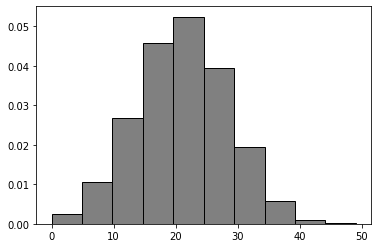

In [ ]:
from random import random 
from math import log
import matplotlib.pyplot as plt
def f():
  T=100 
  l_l=2 
  l_s=2.5 
  t=0 
  infi=100000000
  ts=infi 
  tl=0    
  l=0
  suma=0
  while min(tl,ts)<T:
    ta=t #tiempo del evento anterior
    t=min(tl,ts)
    if l==0:
      suma=suma+t-ta # t-ta es el intervalo de tiempo en el que el servidor estuvo vacio
    if t==tl:
      l=l+1
      #print("%10.3f"%tl,l)
      tl=t-(1/l_l)*log(random())
      if l==1:
        ts=t-(1/l_s)*log(random())       
    else:
      l=l-1
      #print("            ","%10.3f"%ts,l)
      if l==0:
        ts=infi 
      else:
        ts=t-(1./l_s)*log(random())
  return suma
l=[]
suma=0
n=100000
for i in range(n):
  suma+=f()
  l.append(f())
print("Media del tiempo en el que el servidor esta desocupado ",suma/n)
plt.hist(l,density=1,color='grey',edgecolor='black')
plt.show()        
        


Notamos que, por ejemplo la probabilidad de que el servidor este vacio en un tiempo 0 a 5 es el area del rectangulo que aparece en la grafica con dichos intervalos 

**Ejercicio 2** 
Con las mismas hipótesis del problema 1: 

 * a) Estimar el valor esperado del maximo número de personas que habra en le sistema durante el intervalo [0,100]
 * b) El valor esperado del número de personas en el sistema en T=100 

In [ ]:
from random import random 
from math import log
from statistics import mean,variance
import matplotlib.pyplot as plt
def f():
  T=100 
  l_l=2 
  l_s=2.5 
  t=0 
  infi=100000000
  ts=infi 
  tl=0    
  l=0
  suma=0
  ly=[]
  while min(tl,ts)<T:
    ta=t #tiempo del evento anterior
    t=min(tl,ts)
    ly.append(l)
    if l==0:
      suma=suma+t-ta # t-ta es el intervalo de tiempo en el que el servidor estuvo vacio
    if t==tl:
      l=l+1
      #print("%10.3f"%tl,l)
      tl=t-(1/l_l)*log(random())
      if l==1:
        ts=t-(1/l_s)*log(random())       
    else:
      l=l-1
      #print("            ","%10.3f"%ts,l)
      if l==0:
        ts=infi 
      else:
        ts=t-(1./l_s)*log(random())
  return max(ly)
suma=0
n=10000
l=[]
for i in range(n):
  l.append(f()) #otro metodo mas eficiente 
  suma=suma+f()
print("Media de personas en el intervalo [0,100] ",suma/n)
print(mean(l))
print(variance(l))


Media de personas en el intervalo [0,100]  13.3113
13.332
21.7417501750175


¿Cúanto debe ser el parametro de atención a los usuarios para que la probabilidad de que el máximo sea mayor que 25 sea menor que 0.1?

In [ ]:
##parametro l_s es una incognita

from random import random 
from math import log
from statistics import mean,variance
import matplotlib.pyplot as plt
def f(l_s):
  T=100 
  l_l=2 
  t=0 
  infi=100000000
  ts=infi 
  tl=0    
  l=0
  suma=0
  ly=[]
  while min(tl,ts)<T:
    ta=t #tiempo del evento anterior
    t=min(tl,ts)
    ly.append(l)
    if l==0:
      suma=suma+t-ta # t-ta es el intervalo de tiempo en el que el servidor estuvo vacio
    if t==tl:
      l=l+1
      #print("%10.3f"%tl,l)
      tl=t-(1/l_l)*log(random())
      if l==1:
        ts=t-(1/l_s)*log(random())       
    else:
      l=l-1
      #print("            ","%10.3f"%ts,l)
      if l==0:
        ts=infi 
      else:
        ts=t-(1./l_s)*log(random())
  return max(ly)
for l_s in [2,2.1,2.2,2.3,2.4,2.5,2.6]:
  cuenta=0
  n=10000
  for i in range(n):
    if f(l_s)>25:
      cuenta=cuenta+1
  print("Si el parametro es: ",l_s,"   La probabilidad de que el maximo sea mayor que 25 ",cuenta/n,"  ")

Si el parametro es:  2    La probabilidad de que el maximo sea mayor que 25  0.3756   
Si el parametro es:  2.1    La probabilidad de que el maximo sea mayor que 25  0.2404   
Si el parametro es:  2.2    La probabilidad de que el maximo sea mayor que 25  0.1371   
Si el parametro es:  2.3    La probabilidad de que el maximo sea mayor que 25  0.0775   
Si el parametro es:  2.4    La probabilidad de que el maximo sea mayor que 25  0.0423   
Si el parametro es:  2.5    La probabilidad de que el maximo sea mayor que 25  0.0239   
Si el parametro es:  2.6    La probabilidad de que el maximo sea mayor que 25  0.0094   


Entonces el parametro sera aproximadamente 2.3

Nuestro servidor tendria que atender a 2.3 usuarios por minuto para tener una probabilidad (de que el maximo numero de personas sea mayor que 25) sea menor que 10 %

# Reparación de máquinas


Hipotesis
 * El tiempo que tarda en descomponerse una maquina sigue una distribución exponencial (con el mismo parametro para todas las maquinas)
 * El tiempo de reparación de una máquina sigue támbien una exponencial con otro parametro
 * El taller repara las máquinas de una en una, ademas, primer maquina en llegar primer maquina en salir 

La variable que describe el estado del sistema es el número de maquinas de repuesto 

Los eventos que modifican el valor de esta variable son:
 * 1) La descompostura de una maquina (el número de maquinas de repuesto disminuye en una unidad)
 * 2) La salida de una maquina del taller, ya reparada (el número de maquinas de repuesto aumenta en una unidad)

Considerar una lista con los elemtos $[t_1,t_2,...,t_n]$

$t_1$ es el tiempo más proximo de descompostura de la máquina que está en la posición i

In [ ]:
from random import random
from math import log

from statistics import mean,stdev
def F(alfa): #generamos una función que nos genere una Exponencial con parametro Alpha
  return (-1/alfa)*log(random()) #para generar los tiempos de descompostura de las maquinas y timepos de reparación
infi=10000000
alfa=1/50 #parametro de la exponencial de los tiempos de descompostura 1/alpha
# En 50 días es el tiempo esperado que tarda una maquina en descomponerse
beta=1/5 #parametro de la exponencial de los tiempos de reparación
# En promedio en el taller tardan 5 días en reparar la maquina
n=5 #número de maquinas con las que opera la maquina
s=3 #maquinas disponibles para repación en un inicio
disp=s 
td=[] #tiempos mas proximos de descompostura de las maquinas
for i in range(n): #como son n maquinas genero una función que siga una distribución Exponencial
  td.append(F(alfa)) #con parametro alpha
tdp=min(td) #tiempo mas proximo de descompostura de una maquina
#evento mas proximo
tsp=infi #tiempo de salida de una maquina ya repada (en un inicio infinito)
l=0 #numero de mauqinas en el taller (que inicialmente es 0)
inidicador=0
while inidicador==0:
  t=min(tdp,tsp) 
  if tdp==tsp: 
    print("cuidado")
  if t==tdp: #evento mas proximo es la descompostura de una maquina
    if disp==0: #maquinas disponibles es 0 no hay con que reponer la maquina 
      indicador=1 #cambia a valor 1 y la simulación termina
      k=td.index(tdp)
    else: # número de maquinas disponibles es positivo
      disp=disp-1 #tomanos una maquina para sustituir la que no sirve
      l=l+1  #número de maquinas en el taller aumenta en 1
      k=td.index(tdp) #que posición tenia la maquina que se descompuso
      td[k]=t+F(alfa) #proximo tiempo de descompostura que esta en la posición k
      # td = tiempo actual + tiempo de descompostura simulado
      if l==1: #quiere decir que el número de maquinas en el taller era 0 
        tsp=t+F(beta) #el tiempo ya no es infinito 
        # tsp= tiempo actual + tiempo que tarda en reparar (Exponencial(beta))
      tdp=min(td)#actualizo tiempo de la proxima descompostura
    print("Des ","%8.3f"%t,"Maq ",k,disp,l) 
    #print = # Descompostura en que tiempo ocurre,  Maquina en que posición, cuantas quedan disponibles , maquinas en el taller
  else: #salida de una maquina del taller
    l=l-1 #número de maquinas en el taller disminuye en 1
    disp=disp+1 #número de maquinas disponibles aumneta en 1
    if l>0: # si todavia hay maquinas en el taller
      tsp=t+F(beta) #proximo timpo de salida de maquina del taller
      #tsp = tiempo actual + un tiempo de reparacion simulado
    else: #si queda vacio el taller 
      tsp=infi #el proximo tiempo de salida es inity
    print("                                 Fin rep","%8.3f"%t,disp,l)
    # print = Fin de reparación , tiempo en el que ocurre, maquinas disponibles, maquinas en el taller
print(t)

In [ ]:
from numpy.ma.core import std
from random import random
from math import log
from statistics import mean,stdev
def F(alfa):
  return (-1/alfa)*log(random())
infi=1000000
alfa=1/50
beta=1/5
n=5
s=3
disp=s
td=[]
for i in range(n):
  td.append(F(alfa))
tdp=min(td)
tsp=infi
l=0
indicador=0
while indicador==0:
  t=min(tdp,tsp)
  if tdp==tsp:
    print("Cuidado")
  if t==tdp:
    if disp==0:
      indicador=1
      k=td.index(tdp)
    else:
      disp=disp-1
      l=l+1
      k=td.index(tdp)
      td[k]=t+F(alfa)
      if l==1:
        tsp=t+F(beta)
      tdp=min(td)
    print("Des ","%8.2f"%t,"Maq",k,disp,l)
  else:
    l=l-1
    disp=disp+1
    if l>0:
      tsp=t+F(beta)
    else:
      tsp=infi
    print("                                  Fin rep","%8.2f"%t,disp,l)
print(t)

Des     13.84 Maq 1 2 1
                                  Fin rep    14.54 3 0
Des     20.93 Maq 4 2 1
Des     21.44 Maq 1 1 2
Des     24.16 Maq 1 0 3
                                  Fin rep    24.75 1 2
                                  Fin rep    26.98 2 1
                                  Fin rep    32.07 3 0
Des     32.92 Maq 2 2 1
Des     40.79 Maq 1 1 2
                                  Fin rep    41.65 2 1
                                  Fin rep    45.56 3 0
Des     68.58 Maq 2 2 1
                                  Fin rep    68.63 3 0
Des     73.81 Maq 0 2 1
Des     74.11 Maq 0 1 2
                                  Fin rep    78.36 2 1
                                  Fin rep    79.16 3 0
Des     82.80 Maq 3 2 1
                                  Fin rep    86.23 3 0
Des     87.05 Maq 4 2 1
                                  Fin rep    89.09 3 0
Des    100.54 Maq 1 2 1
Des    102.81 Maq 2 1 2
                                  Fin rep   108.61 2 1
                            

# **Simulación de una compañia de seguros**

suposiciones:
 * Se considerada solamente un tipo de poliza.
 * Los siniestros ocurren siguiendo un proceso de Poisson.
 * El pago que tine que realizar la compañia en cada siniestro sigue una distribución Normal.
 * La compalia cobra una cantidad fija a cada cliente cada mes.
 * La compañia paga la nomina quincenalmente.
 * Pueden considerarse otros egreos como por ejemplo, pago de impuestos. 

La varia que describe el estado del sistema es el capital de la misma.

Los eventos que modifican el valor de esta variable son:
 1. La ocurrencia de un siniestro.
 2. El pago de nomina.
 3. El pago de las pólizas por parte de los clientes.




In [ ]:
from random import gauss,random
from math import log

pe=50000      #pago a personal por quincena
tpe=15        #priximo tiempo de pago quicenal
n=10000       #número de clientes
c=150         #cuota mensual por poliza
lam=1         #tasa de ocurrencia de siniestros 
u=35000      
o=5000 #deviación estandar de los pagos por siniestro 
cO=10000000   #capital inical
T=365         #tiempo de simulacion en dias
ta=-(1/lam)*log(random())#tiempo del proximo siniestro Poisson
tp=30         #tiempo del proximo pago de los clientes
Cap=cO        #Capital en el tiempo t
t=0           #Tiempo actual
while t<T and min(ta,tp,tpe)<T: 
  t=min(ta,tp,tpe)
  if t==ta: #proximo evento un ciniestro
    Cap=Cap-gauss(u,o) #pagar por ciniestro, un número generado para una normal con media mu y desv. sigma
    print("siniestro","%10.3f"%t,"%10d"%Cap) #evento Siniestro, tiempo en el que ocurrio, capital despues del ciniestro
    ta=ta-(1/lam)*log(random()) #tiempo de ocurrencia del proximo ciniestro
  elif t==tp: #proximo evento pago de poliza(parte de clientes)
    Cap=Cap+n*c # capital aumenta, en lo que paga cada cliene por número de clientes 
    print("Pago de polizas","      ","%10.3f"%t,"%10d"%Cap) #evento, pago de polizas, timepo en el que ocurre, capital actual
    tp=t+30 #priximo pago de polizas sera despues de 30 días 
  else: #proximo evento pago de nomina
    Cap=Cap-pe #menos pago de poliza
    print("Pago de nomina ","                ","%10.3f"%t,"%10d"%Cap)
    #evento, pago de nomina, timepo y capital
    tpe=tpe+15
print("Ganancia","%15.2f"%(Cap-cO))
print("Ganancia porcentual","%10.3f"%(100*(Cap-cO)/cO))

siniestro      0.967    9963308
siniestro      1.028    9926608
siniestro      1.309    9898984
siniestro      5.705    9859398
siniestro      5.719    9827032
siniestro      7.045    9795546
siniestro      7.993    9767181
siniestro      8.645    9732101
siniestro      8.919    9697126
siniestro      9.152    9658613
siniestro     13.565    9629257
Pago de nomina                       15.000    9579257
siniestro     16.177    9545753
siniestro     16.521    9511670
siniestro     18.024    9474213
siniestro     18.972    9444177
siniestro     21.316    9410885
siniestro     22.174    9368454
siniestro     24.077    9332576
siniestro     24.426    9296683
siniestro     24.935    9262337
siniestro     26.550    9230786
siniestro     26.952    9196110
siniestro     28.403    9155658
siniestro     28.613    9118458
siniestro     29.097    9092093
Pago de polizas            30.000   10592093
Pago de nomina                       30.000   10542093
siniestro     32.325   10507037
siniestro    

**SIMULACIÓN DE CRECIMIEMTO DE POBLACIÓN**




La variable que describe el estado del sistema es en número de elemntos de la población 

Los elementos que nodifican a esta variable son:
1.    El naciemto de un nuevo elemento
2.    El falleciemto de un elemto 

* *Los naciemtos*: ocurren sigueindo un proceso de Poisson con una constante dicetamente proporcional a N(L-N), donde N es el número de elementos de la población y L es una constante que describe el valor máximo que puede tener la población. Si N>L , N(l-N) será negativo y puesto que el paramétro del processo de Poisson siempre tienen que ser positivo, en el caso en el que N>L se supondrá que no puede ocurrir un nacimiento. 
* *Los fallecimientos*: ocurren siquiendo un proceso de Poisson Uniforme 




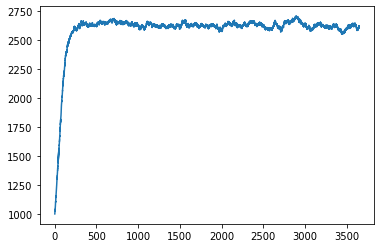

In [ ]:
from random import expovariate
import matplotlib.pyplot as plt
lam_fal=9.8 #fallecimientos (tiempo por día) 9.8 en un día
n=1000
tn=0 #proximo nacimiento
t=0 #reloj del sistema
L=3000 
tf=expovariate(lam_fal) #proximo tiempo en que ocurre un fallecimiento
T=3650 #10 años
lt=[] #eventos, muertes como nacimientos
lp=[] #población
while t<T:
  if n<L: 
    lam_nac=n*(L-n)/100000
  else: #mayor que el limite de la población
    lam_nac=0
  t=min(tn,tf)
  lt.append(t)
  lp.append(n)
  if t== tn:
    n=n+1
    tn=tn+expovariate(lam_nac)
  else:
    n=n-1
    tf=tf+expovariate(lam_fal)

plt.plot(lt,lp)
plt.show()




Cuando $λ$ - nacimientos = 0 no es posible calcular expovariate ($λ$ - nacimientos ), para reeslver este problema se puede asumir la siguente convención: 
 *  Si $λ$ - nacimientos = 0; n>L, entonces el proximo nacimiento seria $\infty$

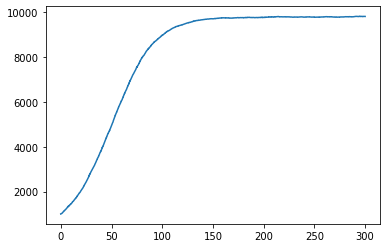

In [ ]:
from random import expovariate
import matplotlib.pyplot as plt
lam_fal=9.8 #fallecimientos (tiempo por día) 9.8 en un día
infi=1000000000
n=1000
tn=0 #proximo nacimiento
t=0 #reloj del sistema
L=10000
tf=expovariate(lam_fal) #proximo tiempo en que ocurre un fallecimiento
T=300 #10 años
lt=[] #eventos, muertes como nacimientos
lp=[] #población
while t<T:
  t=min(tn,tf)
  lt.append(t)
  lp.append(n)
  if t== tn:
    n=n+1
    if n>L:
      tn=infi
    else:
      tn=tn+expovariate(n*(L-n)/200000) 
  else:
    n=n-1
    if n<L and n+1>=L:
      tn=expovariate(n*(L-n)/200000)
    tf=tf+expovariate(lam_fal)

plt.plot(lt,lp)
plt.show()


Note que:
 * Primero crece exponencialmente cuando la n es menor que L

**Ejercicio 03**

Considérese una tienda que está abrierta las 24 hrs. al día, el la que los clientes llegan siguiendo un proceso de Poisson con parámetro 10 clientes por día. Cada cliente compra un solo artículo de entre 3 posibles, A, B, C; compra A con probabilidad 0.3, compra B con probabilidad 0.5 y compra C con probabilidad 0.2. La ganancia por cada artículo A es de 100, por el B es de 120 y por el C es de 150. Se paga al empleado 200 pesos por día y cada semana se paga la renta del local por 3,000 pesos

* a) Esime la ganancia esperada durante un mes
* b) ¿Cuál es la probabilidad de que la ganancia mensual sea menor que 10,000?. Estimela por simulación  
* Investigar la relación entre la ganancia y el sueldo del empleado 

Solución:

La variable que describe el sistema es el Capital, y los eventos que modifican el capital:
 * El pago al empleado ( tpe=tiempo del proximo pago del empleado)
 * Pago alquiler ( tpa = tiempo en el que ocurrirá el próximo pago de alquiler )
 * Llegada de un cliente ( tpc = tiempo en el que ocurrirá la próxima llegada de un cliente )


In [ ]:
from random import random
from math import log 
def gen():
  u=random()
  if u<0.3:
    return 100
  elif u<0.8:
    return 120
  else:
    return 150
cap_ini=50000 #capital inicial
lam=10 # 10 clientes por día
cap=cap_ini #capital va a ir variando
tpe=1 #proximo pago al acabo de un día
tpa=7 # dentro de 7 se paga el alquiler 
tpc=0 #proxima llegada de un cliente
T=30 # tiempo de simulación
t=0 # tiempo de reloj actual
while t<T:
  t=min(tpc,tpe,tpa) #proximo evento
  if t==tpc: #llegada
    gan=gen() #genero el articulo que va comprar dependiendo de las probabilidades
    cap=cap+gan
    print("Llegada  de cliente", "% 8.2f"%t,"% 8.2f"%cap)
    tpc=t-(1/lam)*log(random())
  elif t==tpe: #pago del empleado
    cap=cap-200 
    print("Pago al empleado   ", "% 8.2f"%t,"% 8.2f"%cap)
    tpe=t+1
  else: #pago de alquiler
    cap=cap-3000
    print("Pago de alquiler   ", "% 8.2f"%t,"% 8.2f"%cap)
    tpa=tpa+7

print("Ganancia",cap-cap_ini)
    


    






Llegada  de cliente     0.00  50150.00
Llegada  de cliente     0.01  50270.00
Llegada  de cliente     0.25  50420.00
Llegada  de cliente     0.32  50540.00
Llegada  de cliente     0.49  50640.00
Llegada  de cliente     0.61  50760.00
Llegada  de cliente     0.62  50860.00
Llegada  de cliente     0.68  51010.00
Llegada  de cliente     0.71  51110.00
Llegada  de cliente     0.76  51260.00
Llegada  de cliente     0.99  51360.00
Pago al empleado        1.00  51160.00
Llegada  de cliente     1.08  51280.00
Llegada  de cliente     1.11  51400.00
Llegada  de cliente     1.11  51550.00
Llegada  de cliente     1.11  51670.00
Llegada  de cliente     1.16  51790.00
Llegada  de cliente     1.40  51890.00
Llegada  de cliente     1.43  52010.00
Llegada  de cliente     1.59  52130.00
Llegada  de cliente     1.60  52280.00
Llegada  de cliente     1.90  52400.00
Llegada  de cliente     1.93  52500.00
Pago al empleado        2.00  52300.00
Llegada  de cliente     2.10  52420.00
Llegada  de cliente     2

Ganancia esperada durante un mes 18105.615
La probabilidad de que la ganancia mensual sea menor que 15,000 es:  0.065000


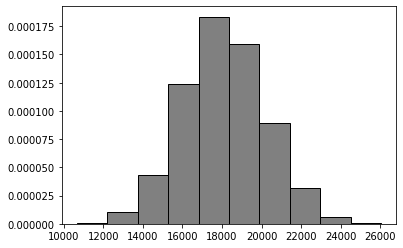

In [ ]:
from statistics import mean
import matplotlib.pyplot as plt
from random import random
from math import log 
def gen():
  u=random()
  if u<0.3:
    return 100
  elif u<0.8:
    return 120
  else:
    return 150

def f():
  cap_ini=50000 #capital inicial
  lam=10 # 10 clientes por día
  cap=cap_ini #capital va a ir variando
  tpe=1 #proximo pago al acabo de un día
  tpa=7 # dentro de 7 se paga el alquiler 
  tpc=0 #proxima llegada de un cliente
  T=30 # tiempo de simulación
  t=0 # tiempo de reloj actual
  while t<T:
    t=min(tpc,tpe,tpa) #proximo evento
    if t==tpc: #llegada
      gan=gen() #genero el articulo que va comprar dependiendo de las probabilidades
      cap=cap+gan
      #print("Llegada  de cliente", "% 8.2f"%t,"% 8.2f"%cap)
      tpc=t-(1/lam)*log(random())
    elif t==tpe: #pago del empleado
      cap=cap-200 
      #print("Pago al empleado   ", "% 8.2f"%t,"% 8.2f"%cap)
      tpe=t+1
    else: #pago de alquiler
      cap=cap-3000
      #print("Pago de alquiler   ", "% 8.2f"%t,"% 8.2f"%cap)
      tpa=tpa+7

  return cap-cap_ini

nr=10000
l=[]
cuenta=0
for i in range(nr):
  x=f()
  if x<15000: #modificamos el 10,000 de ganancias 
    cuenta+=1
  l.append(x)

print("Ganancia esperada durante un mes",mean(l))
print("La probabilidad de que la ganancia mensual sea menor que 15,000 es: ", "%8.6f"%(cuenta/nr))
plt.hist(l,density=l,color='grey',edgecolor='black')
plt.show()
    

Grafica de probabilidades (suma de todas las areas es 1)

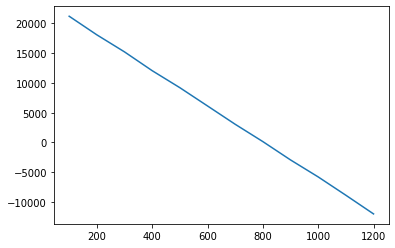

In [ ]:
from statistics import mean
import matplotlib.pyplot as plt
from random import random
from math import log 
def gen():
  u=random()
  if u<0.3:
    return 100
  elif u<0.8:
    return 120
  else:
    return 150

def f(pe):
  cap_ini=50000 #capital inicial
  lam=10 # 10 clientes por día
  cap=cap_ini #capital va a ir variando
  tpe=1 #proximo pago al acabo de un día
  tpa=7 # dentro de 7 se paga el alquiler 
  tpc=0 #proxima llegada de un cliente
  T=30 # tiempo de simulación
  t=0 # tiempo de reloj actual
  while t<T:
    t=min(tpc,tpe,tpa) #proximo evento
    if t==tpc: #llegada
      gan=gen() #genero el articulo que va comprar dependiendo de las probabilidades
      cap=cap+gan
      #print("Llegada  de cliente", "% 8.2f"%t,"% 8.2f"%cap)
      tpc=t-(1/lam)*log(random())
    elif t==tpe: #pago del empleado
      cap=cap-pe
      #print("Pago al empleado   ", "% 8.2f"%t,"% 8.2f"%cap)
      tpe=t+1
    else: #pago de alquiler
      cap=cap-3000
      #print("Pago de alquiler   ", "% 8.2f"%t,"% 8.2f"%cap)
      tpa=tpa+7

  return cap-cap_ini

nr=1000
pago=[100,200,300,400,500,600,700,800,900,1000,1100,1200]
lg=[]
for p in pago:
  suma=0
  for i in range(nr):
    suma+=f(p)
  lg.append(suma/nr)
plt.plot(pago,lg)
plt.show()

